# Cleaning Data
### Data source: Initially the data set was just winequality-red.csv, which obtained from [Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). After reading the documentation, I was led to the [UCIML](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) page, where I was able to find the winequality-white.csv as well.

In [1]:
import pandas as pd

data_red = pd.read_csv("../CSV/winequality-red.csv", sep=";")
data_white = pd.read_csv("../CSV/winequality-white.csv", sep=";")

display(data_red.dtypes, data_white.dtypes)

data_red["color"] = "red"
data_white["color"] = "white"

#data = pd.concat([data_red, data_white])
data = pd.concat([data_white, data_red])

feature = "density"
target = "alcohol"
color_var = "quality"

print("Initial shape:\t\t\t", data.shape)
#display(data)

# Only >2% of the data is missing so just drop it 
# print(data[feature].isna().sum() / data.shape[0]) 
# print(data[target].isna().sum() / data.shape[0])
data = data[data[feature].notna()]
data = data[data[target].notna()]
print("Shape after dropping NaN data:\t", data.shape)

# Handling outliers
for col in [feature, target]:
    col_std = data[col].std()
    col_mean = data[col].mean()

    col_min = col_mean - 3*col_std
    col_max = col_mean + 3*col_std

    data.drop(data[data[col] < col_min].index, inplace=True)
    data.drop(data[data[col] > col_max].index, inplace=True)

print("Shape after droping outliers:\t", data.shape)

data.to_csv("../CSV/winequality-both_cleaned.csv", index=False)
display( pd.read_csv("../CSV/winequality-both_cleaned.csv").dtypes )

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Initial shape:			 (6497, 13)
Shape after dropping NaN data:	 (6497, 13)
Shape after droping outliers:	 (6491, 13)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

# Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.DataFrame(data[feature])
Y = pd.DataFrame(data[target])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)
model = LinearRegression()
model = model.fit(X_train, Y_train) 
print(model.score(X_train, Y_train))

probs = model.predict(X_test)

Y["alc_pred"] = model.predict(X)

0.49031138946905684


# Scatter plots of alcohol over density

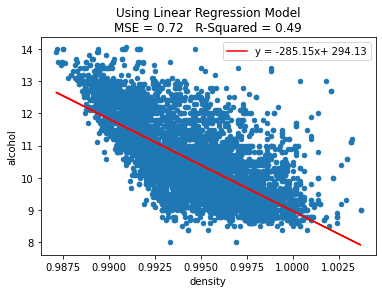

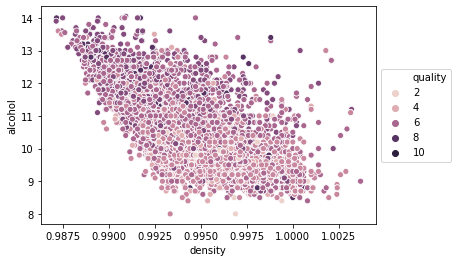

,density
0,1.00100
1,0.99400
2,0.99510
3,0.99560
4,0.99560
...,...
1594,0.99490
1595,0.99512
1596,0.99574
1597,0.99547


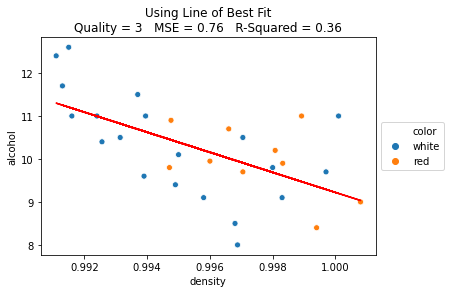

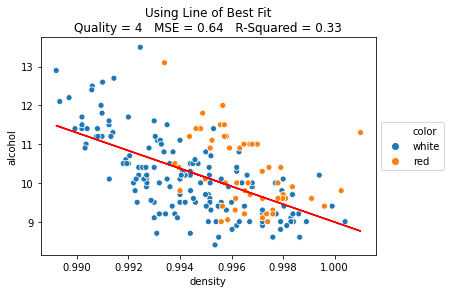

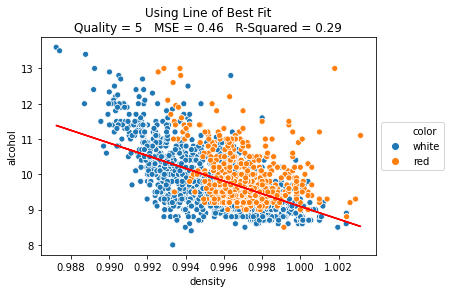

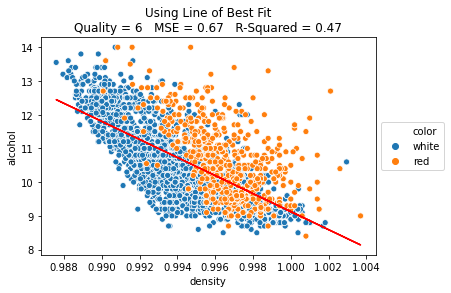

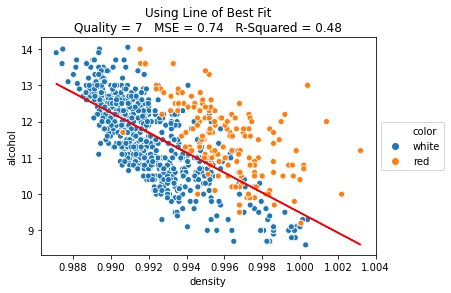

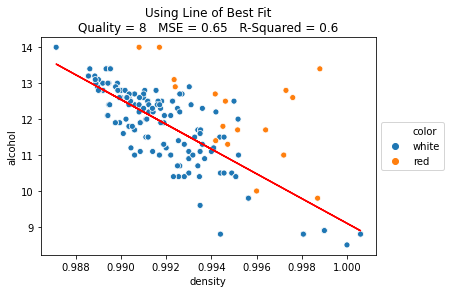

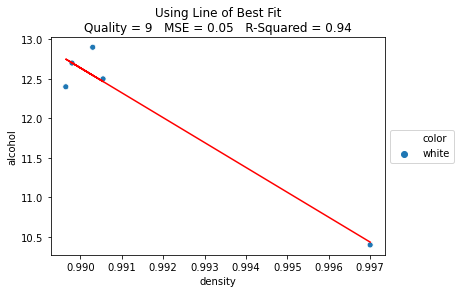

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats # I like this better than np for this section
from sklearn.metrics import mean_squared_error

# Scatter plot
plot = data.plot.scatter(x=feature,y=target)

# Line of best fit
# m, b = np.polyfit(X[feature], Y[target], 1)
m, b, r_value, p_value, std_err = stats.linregress(X[feature], Y[target])
# plot_bf = plt.plot(X, m*X + b, color="red")
plot_bf = plt.plot(X, Y["alc_pred"], color="red")
plt.legend(plot_bf, ["y = {}x+ {}".format(round(m,2), round(b, 2))])

# MSE
Y["alc_pred"] = m*X[feature] + b
MSE =  mean_squared_error(Y[target], Y["alc_pred"])

#plot.legend(plot_bf, ["y = {}x+ {}".format(round(m,2), round(b, 2))], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Using Linear Regression Model\nMSE = {}   R-Squared = {}".format(round(MSE,2), round(r_value**2,2)))
plt.show()
plt.savefig("Images/Scatter_LR.png")

# Scatter plot colored by quality
plot_2 = sns.scatterplot(data=data, x=feature, y=target, hue=color_var)
plot_2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.savefig("Images/Scatter_LR_Quality.png")



display(X)

# Test for-loop for all the qualities
for q in sorted(list(data[color_var].unique())):
    X_temp = pd.DataFrame()
    Y_temp = pd.DataFrame()
    X_temp[feature] = data.loc[data[color_var]==q, feature]
    Y_temp[target] = data.loc[data[color_var]==q, target]
    
    
   # Scatter plot
    #plot = data[data[color_var]==q].plot.scatter(x=feature,y=target)
    plot = sns.scatterplot(data=data[data[color_var]==q], x=feature, y=target, hue="color")
    plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Line of best fit    
    # m, b = np.polyfit(X_temp[feature], Y_temp[target], 1)
    m, b, r_value, p_value, std_err = stats.linregress(X_temp[feature], Y_temp[target])
    plot_bf = plt.plot(X_temp[feature], m*X_temp[feature] + b, color="red")
    
    # MSE
    Y_temp["alc_pred"] = m*X_temp[feature] + b
    MSE =  mean_squared_error(Y_temp[target], Y_temp["alc_pred"])
    
    #plot.legend(plot_bf, ["y = {}x+ {}".format(round(m,2), round(b, 2))], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Using Line of Best Fit\nQuality = {}   MSE = {}   R-Squared = {}".format(q, round(MSE,2), round(r_value**2,2)))
    plt.show()

In [ ]:
data.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [14]:
data_corr = data.corr()["alcohol"]
print(data_corr)

fixed acidity          -0.099398
volatile acidity       -0.038578
citric acid            -0.012092
residual sugar         -0.365754
chlorides              -0.257997
free sulfur dioxide    -0.179664
total sulfur dioxide   -0.265404
density                -0.702899
pH                      0.122194
sulphates              -0.004412
alcohol                 1.000000
quality                 0.445687
Name: alcohol, dtype: float64

In [20]:
import sys
sys.version

'3.8.3 (default, Jul  2 2020, 11:26:31) \n[Clang 10.0.0 ]'